# Fund Raising Simulation

In [3]:
import random as rd
import statistics as st
import numpy.random as npr
import matplotlib.pyplot as plt

In [9]:
#input parameters
donors = 20
pr_answer = 0.40
pr_donate = 0.50
donation_mean = 200.00
donation_std = 50.00

In [10]:
# user defined simulation function
# arguments: calls = number of phone calls, trials = number of simulation trials
# returns: list of simulated total donation amounts

def fundraise_sim(calls,trials):
    sample = []
    for i in range(trials):
        number_answer = npr.binomial(calls,pr_answer)
        number_donate = npr.binomial(number_answer,pr_donate)
        tot_donations = 0
        for d in range(number_donate):
            donation = rd.normalvariate(donation_mean,donation_std)
            tot_donations = tot_donations + donation
        sample.append(tot_donations)
    return(sample)


In [11]:
trials = 1000
sample = fundraise_sim(donors,trials)
print('Mean = %5.2f' % st.mean(sample))
print('St.Dev. = %5.2f' % st.stdev(sample))

Mean = 814.54
St.Dev. = 375.05


(array([ 41., 111., 184., 200., 197., 133.,  86.,  30.,  17.,   1.]),
 array([   0.        ,  208.91409904,  417.82819808,  626.74229712,
         835.65639616, 1044.57049519, 1253.48459423, 1462.39869327,
        1671.31279231, 1880.22689135, 2089.14099039]),
 <BarContainer object of 10 artists>)

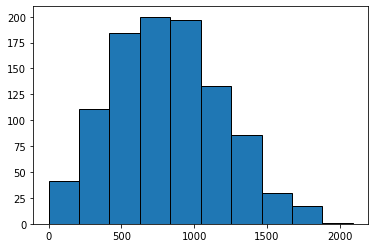

In [12]:
plt.hist(sample, edgecolor='k')

In [13]:
sample_mean = st.mean(sample)
sample_std = st.stdev(sample)
moe = 1.96 * sample_std / len(sample) ** 0.5
lcl = sample_mean - moe
ucl = sample_mean + moe
print('The 95%% confidence interval for the mean of the total donations is (%6.2f, %6.2f)' % (lcl,ucl))

The 95% confidence interval for the mean of the total donations is (791.29, 837.78)


In [14]:
proportion = sum(1 for x in sample if x >= 1000) / len(sample)
print('There is a %5.2f%% chance of raising at least $1,000.' % (100*proportion))

There is a 31.10% chance of raising at least $1,000.


In [15]:
# 90% confidence interval for the proportion
moe = 1.645 * (proportion * (1 - proportion) / len(sample)) ** 0.5
lcl = proportion - moe
if lcl < 0.0: lcl = 0.0
ucl = proportion + moe
print('The 90%% confidence interval for the probability of raising at least $1,000 is (%6.4f, %6.4f).' % (lcl,ucl))

The 90% confidence interval for the probability of raising at least $1,000 is (0.2869, 0.3351).
